<h3 style="size: 155px;">INTRODUCTION</h3>

<p>This project develops, evaluates and compares different machine learning models in Python to predict the energy yield (MWh) of a gas turbine based on various operational and environmental factors. A dataset that contains information on the operating conditions is used. The data set is preprocessed to remove missing values and normalize the input features to prepare it for training the model. New features will be created and the training model will be evaluated and re-evaluated using metrics as well as the 5-fold technique. Finally we will visualize the data to gain insight into the interaction between the features and the target variable (Turbine Energy Yield).</p>

In [72]:
# import modules and libraries
import pandas as pd
import numpy as np
from pandas.io.formats.style import plt
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
from math import sqrt
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [73]:
# Read in the CSV files
df_2011 = pd.read_csv('/content/gt_2011.csv')
df_2012 = pd.read_csv('/content/gt_2012.csv')
df_2013 = pd.read_csv('/content/gt_2013.csv')
df_2014 = pd.read_csv('/content/gt_2014.csv')
df_2015 = pd.read_csv('/content/gt_2015.csv')

In [74]:
# view the first three rows of the dataframe of 2011 sensor data
df_2011.head(3)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776


<h3 style="size: 155px;">DATA DESCRIPTION</h3>

<p>The columns of the dataset are abbreviated as Ambient Temperature (AT/°C) Ambient pressure (AP/mbar), Ambient humidity (AH/%), Air filter Difference Pressure (AFDP/mbar), Gas Turbine Exhaust Pressure (GTEP/mbar), Turbine Inlet Temperature (TIT/°C), Turbine after Temperature (TAT/°C), Compressor Discharge Pressure (CDP/mbar), Turbine Energy Yield (TEY/MWh), Carbon Monoxide (CO/mg/m3),Nitrogen Oxides (NOx/mg/m3). The Data is sourced from the UCI Machine Learning Repo.</p>
<p>Our target variable, is the Turbine Energy Yield (TEY).</p>

In [75]:
# Concatenate all the data frames into a single data frame
df = pd.concat([df_2011, df_2012, df_2013, df_2014, df_2015], ignore_index=True)

In [76]:
# Print the first few rows of the combined data frame to verify that it was created successfully
df.head(3)


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776


<h3 style="size: 155px;">EXPLOLATORY DATA ANALYSIS</h3>

<p>We check for missing values and explore the data for insights by plotting the variables with the target variable.</p>


In [77]:
# check for missing values or nan
np.any(np.isnan(df))

False

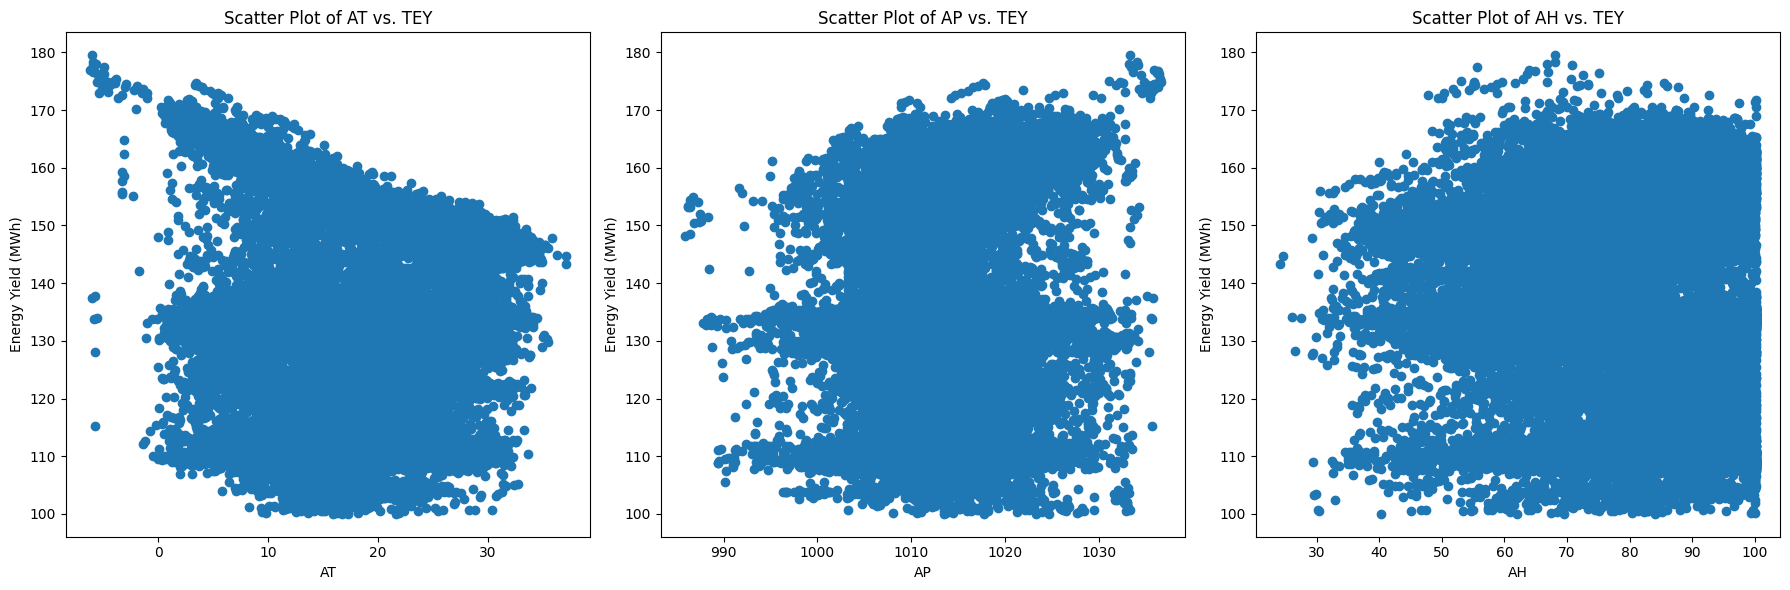

In [78]:
# PLOT 1
# Define the columns to plot
columns_to_plot = ['AT', 'AP', 'AH', 'TEY']

# Create a dataframe with the selected columns
df_plot = df[columns_to_plot]

# Create scatter plots of the relationship between each of the top three features and the target variable
plt.figure(figsize=(18, 6))
for i, column in enumerate(df_plot.columns[:-1]):
    plt.subplot(1, 3, i+1)
    plt.scatter(df_plot[column], df_plot['TEY'])
    plt.xlabel(column)
    plt.ylabel('Energy Yield (MWh)')
    plt.title('Scatter Plot of {} vs. TEY'.format(column))
plt.tight_layout()
plt.show()


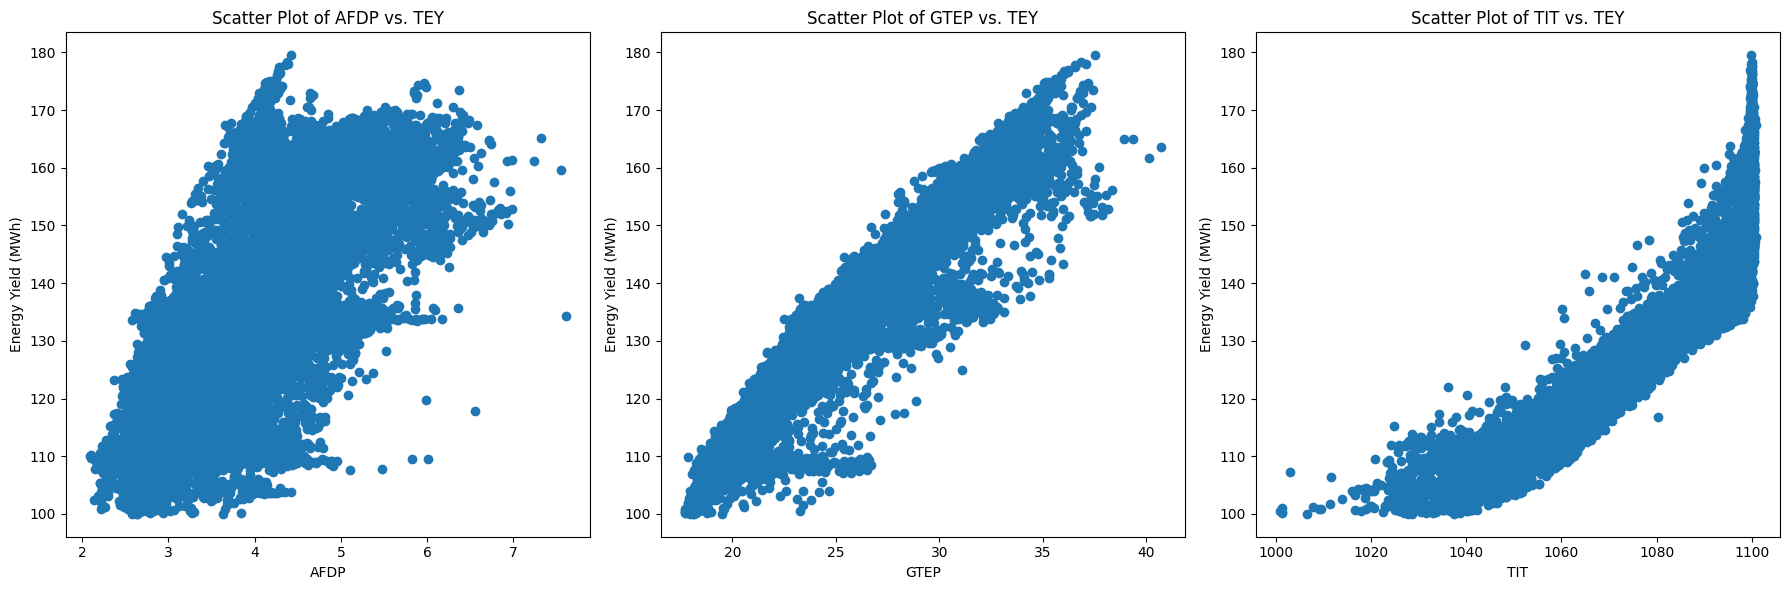

In [79]:
# PLOT 2
columns_to_plot = ['AFDP', 'GTEP', 'TIT', 'TEY']

# Create a dataframe with the selected columns
df_plot = df[columns_to_plot]

# Create scatter plots of the relationship between each of the top three features and the target variable
plt.figure(figsize=(18, 6))
for i, column in enumerate(df_plot.columns[:-1]):
    plt.subplot(1, 3, i+1)
    plt.scatter(df_plot[column], df_plot['TEY'])
    plt.xlabel(column)
    plt.ylabel('Energy Yield (MWh)')
    plt.title('Scatter Plot of {} vs. TEY'.format(column))
plt.tight_layout()
plt.show()

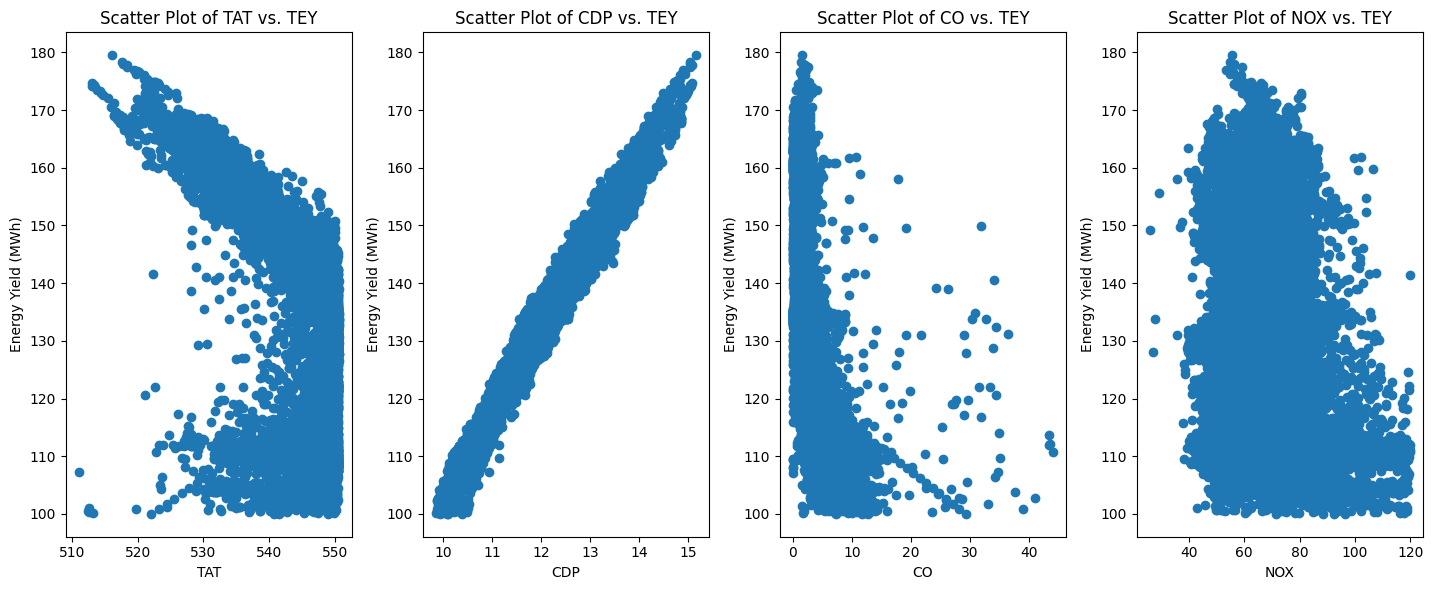

In [80]:
# PLOT 3
# Define the columns to plot
columns_to_plot = ['TAT', 'CDP', 'CO', 'NOX', 'TEY']

# Create a dataframe with the selected columns
df_plot = df[columns_to_plot]

# Create scatter plots of the relationship between each of the top three features and the target variable
plt.figure(figsize=(18, 6))
for i, column in enumerate(df_plot.columns[:-1]):
    plt.subplot(1, 5, i+1)
    plt.scatter(df_plot[column], df_plot['TEY'])
    plt.xlabel(column)
    plt.ylabel('Energy Yield (MWh)')
    plt.title('Scatter Plot of {} vs. TEY'.format(column))
plt.tight_layout()

plt.show()

<h3 style="size: 155px;">Analysing the Plots</h3>

<p>From scattered plots of each feature against the label (target), the Heat Rate, AP/CDP Ratio, Temperature Ratio (TIT/TAT), Temperature Difference (TIT - TAT), Compressor Discharge Pressure and GTEP showed some type of linear relationships.</p>

<h3 style="size: 155px;">FEATURES ENGINEERING</h3>

<p>Next we create new features from existing features, which can reveal new or hidden patterns or relationships with the target variable. It also helps to check underfitting or overfitting by adding a little bit of complexity to the dataset.</p>

In [81]:
# Saturated Vapour Pressure
# Define the Antoine equation as a function
def antoine_eq(T):
    A = 8.07131
    B = 1730.63
    C = 233.426
    return (10**(A - B/(T + C)))*1.33322

# Create a new column 'SVP' in the dataframe and apply the Antoine equation to each AT value
df['SVP'] = df['AT'].apply(lambda x: antoine_eq(x))

<h3 style="size: 155px;">Temperature Difference (TIT - TAT)</h3>

<p>This new feature captures the temperature difference of the temperature before and after the turbine. The intuition behind this feature is that the turbine is extracting energy from the hot air, which will cause the temperature to decrease as the air passes through the turbine. By taking the difference between the two temperature variables, we can capture how much energy is being extracted by the turbine in terms of temperature units. This feature could be helpful in predicting the efficiency of the system, as a larger temperature difference would indicate that more energy is being extracted by the turbine.</p>
<p>The temperature difference feature is related to the temperature ratio feature that we discussed earlier. The temperature ratio is a normalized measure of the temperature difference, whereas the temperature difference is an absolute measure of the temperature change. Both features can be useful depending on the specific application and the machine learning algorithm being used.</p>


In [82]:
# Calculate temperature difference, between inlet temp and after temperature.
df['Temp_Diff'] = df['TIT'] - df['TAT']

<h3 style="size: 155px;">Temperature Ratio (TIT/TAT)</h3>

<p>The temperature ratio is a normalized measure of the temperature difference, whereas the temperature difference is an absolute measure of the temperature change. Both features can be useful depending on the specific application and the machine learning algorithm being used.
This gives a new feature that captures the ratio of the temperature before and after the turbine. The intuition behind this feature is that the turbine is extracting energy from the hot air, which will cause the temperature to decrease as the air passes through the turbine. By taking the ratio of the two temperature variables, you can capture how much energy is being extracted by the turbine relative to the initial temperature of the air. This feature could be helpful in predicting the efficiency of the system, as a higher temperature ratio would indicate that more energy is being extracted by the turbine.</p>

In [83]:
# Estimate the temperature ratio
df['Temp_Ratio'] = df['TIT']/df['TAT']

<h3 style="size: 155px;">Pressure Ratio: CDP/GTEP</h3>

<p>This new feature can capture the pressure difference across the turbine, which affects the amount of energy that can be extracted from the combustion gases.</p>

In [84]:
df['Ratio_CDP_GTEP'] = df['CDP']/df['GTEP']

<h3 style="size: 155px;">Pressure Ratio: GTEP/CDP</h3>

<p>This feature captures the pressure difference between the gas turbine exhaust and the compressor discharge, which can affect the energy yield.</p>

In [85]:
df['Ratio_GTEP_CDP'] = df['GTEP']/df['CDP']

<h3 style="size: 155px;">Pressure Ratio: AP/CDP</h3>

<p>This new feature takes the ratio of two pressure variables, the Ambient pressure (AP) and Compressor discharge pressure (CDP). This could help capture how much the compressor is pressurizing the air relative to the ambient pressure.</p>

In [86]:
df['Ratio_AP_CDP'] = df['AP']/df['CDP']

<h3 style="size: 155px;">Heat Rate: (TEY/(TIT - TAT))</h3>

<p>This feature measures the efficiency of the turbine in converting thermal energy into electrical energy and could be a strong predictor of energy yield as it shows the energy yeild per degree Celcius of Temperature (differential temperature between in the inlet and outlet, in other words the temperature to do work).</p>

In [87]:
df['Heat_Rate'] = df['TEY']/df['Temp_Diff']

<h3 style="size: 155px;">CO/NOx Ratio</h3>

<p>This feature could capture the combustion efficiency of the turbine and could be a good predictor of energy yield. Therefore, in relation to estimating the efficiency of a turbine, a lower CO/NOx ratio is generally indicative of a more efficient combustion process and a higher energy yield. However, it is important to note that other factors can also affect the efficiency of a turbine, so the CO/NOx ratio should be considered in conjunction with other features in the dataset.</p> 

In [88]:
df['CO_NOX_Ratio'] = df['CO']/df['NOX']

<h3 style="size: 155px;">Humidity Ratio</h3>

<p>This is the ratio of the mass of water vapor to the mass of dry air in a gas mixture, and can be calculated using the formula Humidity Ratio = 0.62198 * AH / (AP - AH * 0.378). It can be a good predictor of combustion efficiency.</p>

In [89]:
df['Humidity_Ratio'] = (0.62198 * df['AH'])/(df['AP'] - df['AH'] * 0.378)

<h3 style="size: 155px;">NOx Emissions Rate</h3>

<p>This is the rate at which nitrogen oxides are emitted from the turbine, and can be calculated using the formula NOx Emissions Rate = NOx / TEY. It can be a good predictor of turbine efficiency and environmental impact.</p>

In [90]:
df['NOX_Emis_Rate'] = df['NOX']/df['TEY']

<h3 style="size: 155px;">Temperature-Pressure Product (TPP): (AT*AP*GTEP)/CDP</h3>

<p>
This feature takes into account the combined effect of ambient temperature, pressure, and gas turbine exhaust pressure on the energy yield.</p>

In [91]:
df['Tem_Pres_Prod'] = df['AT']*df['AP']*df['GTEP']

In [92]:
# Temperature pressure product (TPP)/CDP ratio
df['TPP_CDP_Ratio'] = df['Tem_Pres_Prod']/df['CDP']

<h3 style="size: 155px;">Combustion Efficiency (CE) = 1 - (CO / NOx)</h3>

<p>
This feature represents the efficiency of combustion, which can have a direct impact on the energy yield.</p>

In [93]:
df['Comb_Eff'] = 1 - (df['CO_NOX_Ratio'])

<h3 style="size: 155px;">Specific Humidity (SH)</h3>

<p>This feature calculates the mass of water vapor per unit mass of dry air.</p>

In [94]:
df['Spec_Humid'] = (0.622 * df['AH']) / (1 - df['AH'])

<h3 style="size: 155px;">Absolute Humidity (AHabs)</h3>

<p>This feature calculates the mass of water vapor per unit volume of air.</p>

In [95]:
import math
df['AHabs'] = (6.112 * math.e**(17.67 * df['AT'] / (df['AT'] + 243.5)) * df['AH'] * 2.1674) / (273.15 + df['AT'])

In [96]:
# view the data to show the new features
df.head(3)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,...,Ratio_AP_CDP,Heat_Rate,CO_NOX_Ratio,Humidity_Ratio,NOX_Emis_Rate,Tem_Pres_Prod,TPP_CDP_Ratio,Comb_Eff,Spec_Humid,AHabs
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,...,85.619432,0.251077,0.003986,0.052726,0.608539,112068.059211,9419.067004,0.996014,-0.629523,5.533443
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,...,85.628994,0.251227,0.005436,0.053112,0.611695,104708.156928,8804.924061,0.994564,-0.629473,5.462587
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,...,84.570669,0.251907,0.005389,0.053512,0.620104,95392.463772,7921.646219,0.994611,-0.629417,5.362405


<h3 style="size: 155px;">INTERACTION OF FEATURES</h3>

<p>This will give an idea of how each new feature is related to the Turbine Energy Yield, and which features have the strongest correlation with it. Its important to note that correlation does not necessarily imply causation, as such further analysis is needed to establish causal relationships.</p>

In [97]:
# Interaction of Features. 
# select the columns of interest
cols_of_interest = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'AHabs', 'CDP', 'CO','NOX', 'Temp_Diff', 
                    'Temp_Ratio', 'Ratio_CDP_GTEP', 'Ratio_GTEP_CDP', 'Ratio_AP_CDP', 'Heat_Rate', 'CO_NOX_Ratio', 
                    'Humidity_Ratio', 'NOX_Emis_Rate', 'Tem_Pres_Prod', 'TPP_CDP_Ratio', 'Comb_Eff', 'Spec_Humid', 'TEY']
# create a correlation matrix
corr_matrix = df[cols_of_interest].corr()

# sort the correlations with energy yield in descending order
corr_with_energy_yield = corr_matrix['TEY'].sort_values(ascending=False)

# print the correlations with energy yield
print(corr_with_energy_yield)


TEY               1.000000
Heat_Rate         0.994447
CDP               0.988778
Temp_Diff         0.977261
Temp_Ratio        0.971233
GTEP              0.964127
TIT               0.910297
Ratio_GTEP_CDP    0.883305
AFDP              0.665483
Comb_Eff          0.600080
Tem_Pres_Prod     0.211961
AP                0.118224
TPP_CDP_Ratio     0.051454
AT               -0.091152
NOX              -0.116127
Spec_Humid       -0.119599
AH               -0.137360
Humidity_Ratio   -0.141464
AHabs            -0.155387
CO               -0.569813
NOX_Emis_Rate    -0.587385
CO_NOX_Ratio     -0.600080
TAT              -0.682396
Ratio_CDP_GTEP   -0.892619
Ratio_AP_CDP     -0.982817
Name: TEY, dtype: float64


<h3 style="size: 155px;">CREATING NEW FEATURES USING POLYNOMIAL TRANSFORMATION</h3>

<p>Polynomial transformation is used to create new features by combining the existing features with their polynomial terms. It involves creating higher-order terms by multiplying features with each other and raising them to a power. For example, if we have a single feature x, a second-order polynomial transformation would create two new features: x^2 and x.</p>

<p>There are several reasons why we might want to use polynomial transformation on features:</p>

<li>Non-linear relationships: Sometimes, the relationship between the features and the target variable is non-linear. In these cases, adding polynomial terms can help capture these non-linear relationships and improve the performance of the model</li>.

<li>Interaction effects: Polynomial features can also capture interaction effects between features. For example, if we have two features x1 and x2, the polynomial transformation can create a new feature x1x2, which captures the interaction effect between x1 and x2.</li>

<li>Feature engineering: Polynomial transformation is a form of feature engineering that can help improve the performance of the model. By creating new features, we can increase the amount of information available to the model and make it easier to learn complex relationships.</li>

It's worth noting that polynomial transformation can also lead to overfitting if not used carefully. Adding too many polynomial terms can result in a model that is too complex and performs well on the training data but poorly on the test data. It's important to use techniques like cross-validation to ensure that the model is not overfitting which will be applied later.

In [98]:
# Polynomial Transformation
# select the columns of interest
cols_of_interest = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX', 'Temp_Diff', 'Temp_Ratio', 'Ratio_CDP_GTEP', 'Ratio_GTEP_CDP',
       'Ratio_AP_CDP', 'Heat_Rate', 'CO_NOX_Ratio', 'Humidity_Ratio',
       'NOX_Emis_Rate', 'Tem_Pres_Prod', 'TPP_CDP_Ratio', 'Comb_Eff',
       'Spec_Humid', 'AHabs']

# create a new DataFrame with only the columns of interest
df_new = df[cols_of_interest]

# specify the degree of the polynomial transformation
degree = 2

# create the polynomial features
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(df_new.iloc[:, :-1])

# add the polynomial features to the DataFrame
df_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(df_new.columns[:-1]))

# add the energy yield column back to the DataFrame
df_poly['TEY'] = df_new['TEY']

# calculate the correlation matrix
corr_matrix = df_poly.corr()

# sort the correlations with energy yield in descending order
corr_with_energy_yield = corr_matrix['TEY'].sort_values(ascending=False)

# print the correlations with energy yield
print(corr_with_energy_yield)


TEY                     1.000000
Temp_Diff Heat_Rate     1.000000
TIT TEY                 0.999175
AP TEY                  0.998509
TEY Temp_Diff           0.998418
                          ...   
TAT Ratio_AP_CDP       -0.985804
CDP Spec_Humid         -0.986192
Heat_Rate Spec_Humid   -0.994661
TEY Spec_Humid         -0.999620
1                            NaN
Name: TEY, Length: 325, dtype: float64


<p>This output indicates the pairwise correlations between the Turbine Energy Yield (TEY) and other features (parameters) in the dataset after polynomial transformation has been applied.</p>

<p>The value of 1.000000 for the TEY column indicates that it has a perfect positive correlation with itself, which is expected. The correlation coefficient ranges from -1 to 1, where 1 indicates a perfect positive correlation, 0 indicates no correlation, and -1 indicates a perfect negative correlation.</p>

<p>The other correlation coefficients range between -1 and 1 and indicate the strength and direction of the linear relationship between the corresponding columns. For example, a coefficient of 0.998509 between the TEY and AP columns suggests a very strong positive linear relationship, while a coefficient of -0.985804 between the TEY and TAT Ratio_AP_CDP columns suggests a strong negative linear relationship.</p>

<p>It's important to note that correlation does not imply causation. A high correlation between two variables does not necessarily mean that one causes the other. It's also possible for two variables to have a high correlation without having a causal relationship, as there may be other factors that influence both variables. Therefore, it's important to interpret the correlation results carefully and consider other factors before drawing any conclusions.</p>

<h3 style="size: 155px;">LOGARITHMIC TRANSFORMATION</h3>

<p>Logarithmic transformation is another commonly used technique in machine learning to transform features. It involves taking the logarithm of the feature values, usually with base 10 or natural logarithm (base e)..</p>

<p>Some reasons why we use logarithmic transformation on features:</p>

<li>Skewed distributions: Sometimes, the distribution of the feature values is highly skewed, with most of the values concentrated in a narrow range and a few extreme values that are much larger or smaller than the rest. In these cases, logarithmic transformation can help to "spread out" the values and make the distribution more normal or bell-shaped. This can improve the performance of certain models that assume normality, such as linear regression.</li>

<li>Compression of large values: Logarithmic transformation can compress large values, making them more comparable to smaller values. This can help to reduce the influence of extreme values on the model and make the model more robust to outliers.</li>

<li>Multiplicative relationships: Logarithmic transformation can also be useful when the relationship between the feature and the target variable is multiplicative rather than additive. Taking the logarithm of both the feature and the target variable can convert the multiplicative relationship to an additive one, which can be easier for the model to learn.</li>

It's worth noting that logarithmic transformation is not always necessary or appropriate for every dataset or model. It depends on the specific characteristics of the data and the problem at hand. It's important to carefully examine the distribution of the feature values and consider other transformation techniques as well, such as square root or box-cox transformations, before deciding on a transformation approach.

In [99]:
# Apply logarithmic transformation to an existing feature
# select the columns of interest
cols_of_interest = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX', 'Temp_Diff', 'Temp_Ratio', 'Ratio_CDP_GTEP', 'Ratio_GTEP_CDP',
       'Ratio_AP_CDP', 'Heat_Rate', 'CO_NOX_Ratio', 'Humidity_Ratio',
       'NOX_Emis_Rate', 'Tem_Pres_Prod', 'TPP_CDP_Ratio', 'Comb_Eff',
       'Spec_Humid', 'AHabs']

# create a new dataframe from the columns of interest
df_new2 = df_new[cols_of_interest]

# apply logarithmic transformation to each column
for col in cols_of_interest:
    df_new2[f'Log_{col}'] = np.log(df[col])

# calculate the correlation matrix
corr_matrix = df_new2.corr()

# sort the correlations with energy yield in descending order
corr_with_energy_yield = corr_matrix['TEY'].sort_values(ascending=False)

# print the correlations with energy yield
print(corr_with_energy_yield)




/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


TEY                   1.000000
Log_TEY               0.997486
Heat_Rate             0.994447
Log_Heat_Rate         0.992061
Log_CDP               0.989246
CDP                   0.988778
Temp_Diff             0.977261
Log_Temp_Diff         0.975844
Log_Temp_Ratio        0.972845
Temp_Ratio            0.971233
Log_GTEP              0.966287
GTEP                  0.964127
TIT                   0.910297
Log_TIT               0.908378
Log_Ratio_GTEP_CDP    0.889235
Ratio_GTEP_CDP        0.883305
Log_AFDP              0.671139
AFDP                  0.665483
Comb_Eff              0.600080
Log_Comb_Eff          0.559040
Tem_Pres_Prod         0.211961
Log_Tem_Pres_Prod     0.173077
AP                    0.118224
Log_AP                0.117986
TPP_CDP_Ratio         0.051454
Log_TPP_CDP_Ratio     0.017011
Log_NOX              -0.082447
AT                   -0.091152
Log_AT               -0.112081
NOX                  -0.116127
Spec_Humid           -0.119599
Log_AH               -0.130538
Log_Humi

Looking at the results, theres no much difference between the acutal values and the transformed log values. Hence its safe to proceed with the analysis on the original dataframe. We use a heat map to check the interaction actions among the features.

Selected features: {'TPP_CDP_Ratio', 'Ratio_AP_CDP', 'Temp_Diff', 'Ratio_GTEP_CDP', 'Tem_Pres_Prod', 'Comb_Eff', 'SVP', 'TIT', 'Heat_Rate', 'Spec_Humid', 'NOX_Emis_Rate', 'TEY', 'AHabs', 'Temp_Ratio', 'CDP', 'Ratio_CDP_GTEP', 'Humidity_Ratio', 'CO_NOX_Ratio'}


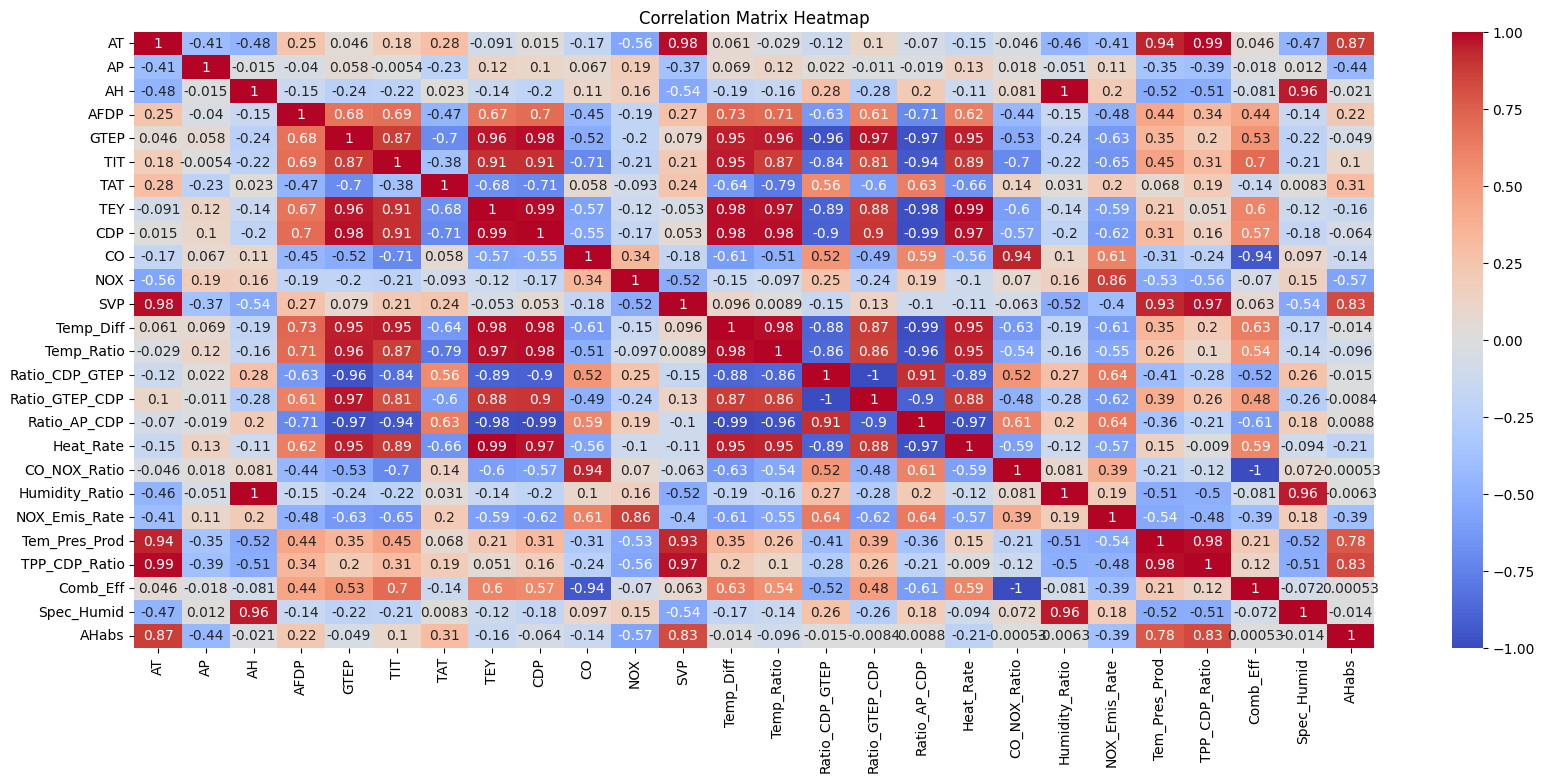

In [100]:
# Heat Map calculate correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(20, 8))

# visualize correlation matrix as heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
ax.set_title('Correlation Matrix Heatmap')

# select features with correlation above threshold
corr_threshold = 0.8
corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > corr_threshold:
            corr_features.add(corr_matrix.columns[i])
            
# print selected features
print('Selected features:', corr_features)


<p>The output of the correlation test after the logarithmic transformation shows that Heat_Rate, Compressor Discharge Pressure (CDP), Temperature Difference (Temp_Diff), Tempearature Ratio (Temp_Ratio), GTEP and Turbine Inlet Temperature (TIT) had positive correlation values above 0.8 while CDP_GTEP ratio and AP_CDP ratio had negative correlation values above -0.8 with the Turbine Energy Yield (TEY)....we can also isolate these as our training features later</p>

<h3 style="size: 155px;">TRAINING & EVALUATING MODELS</h3>
<h3> Data Split </h3>

<p>
Data will be split into training and testing datasets to train, test and evaluate the performance of the machine learning model. 80% of the data will be used for training and 20% for testing.
</p>

<h3 style="size: 155px;">LINEAR REGRESSION</h3>
<p>Linear regression is a simple, easy-to-understand machine learning model that can handle large datasets with many input variables. It is a versatile algorithm that can be used for both regression and classification tasks. The coefficients of a linear regression model are easily interpretable, and the model does not require tuning of hyperparameters. However, linear regression assumes that the relationship between the input and output variables is linear and may not perform well if the relationship is non-linear. It is also sensitive to outliers and multicollinearity, and cannot capture complex non-linear relationships between the input and output variables.</p>


In [101]:
# The features and target variables need to be separated.

X = df[['Heat_Rate', 'CDP', 'Temp_Diff', 'Temp_Ratio', 'GTEP', 'TIT', 'Ratio_GTEP_CDP', 'AFDP', 'Comb_Eff', 'CO', 'NOX_Emis_Rate', 'CO_NOX_Ratio', 'TAT', 'Ratio_CDP_GTEP', 'Ratio_AP_CDP']] # drop the target variable column from the features dataframe
y = df['TEY']
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the model and Train a linear regression model on the training set
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
y_pred = linear_model.predict(X_test)

# Compare the predicted target variable values with the actual (true) target variable values for the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error: ", mse)
print("R-squared: ", r2)
print("Root Mean Squared Error: ", rmse)

Mean Squared Error:  0.0185686819266412
R-squared:  0.9999238080275501
Root Mean Squared Error:  0.1362669509699296


<p>
The mean squared error (MSE) value of 0.00046 suggests that, on average, the squared difference between the predicted and true values is quite small.
The R-squared (R2) value of 0.99999 also indicates that the model explains a high percentage of the variability in the target variable, which is a good sign. An R2 value of 1.0 would indicate a perfect fit, but a value close to 1.0 suggests that the model is doing well in explaining the variation in the target variable.
The root mean squared error (RMSE) value of 0.02145 suggests that, on average, the difference between the predicted and true values is quite small. Since the RMSE is the same unit as the target variable, it means that on average, the model's predictions are within +/- 0.021 MWh of the true values. This is a relatively small error in the context of the problem and suggests that the model is making accurate predictions.
Overall, these evaluation metrics suggest that the model is performing very well on the test set.
</p>


<h3 style="size: 155px;">RANDOM FOREST REGRESSION</h3>
<p>Random Forest algorithm that can be used for both regression and classification tasks. It is an ensemble method that combines multiple decision trees to make predictions. Each tree in the forest is trained on a random subset of the input variables, which helps to reduce overfitting and improve generalization performance. Random Forest also provides a measure of feature importance and is relatively easy to interpret. It can handle large datasets with many input variables and is robust to outliers and missing data. However, Random Forest can be computationally intensive and may not perform as well as other algorithms on datasets with highly correlated input variables.</p>


In [102]:
# RandomForestRegressor

# Splitting the data into input features and target variable
#X = df.drop('TEY', axis=1)  # drop the target variable column from the features dataframe
#y = df['TEY']  # select the target variable column
X = df[['Heat_Rate', 'CDP', 'Temp_Diff', 'Temp_Ratio', 'GTEP', 'TIT', 'Ratio_GTEP_CDP', 'AFDP', 'Comb_Eff', 'CO', 'NOX_Emis_Rate', 'CO_NOX_Ratio', 'TAT', 'Ratio_CDP_GTEP', 'Ratio_AP_CDP']] # drop the target variable column from the features dataframe
y = df['TEY']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Print the evaluation metrics
print("Random Forest Regression MAE: ", rf_mae)
print("Random Forest Regression R2 score: ", rf_r2)

Random Forest Regression MAE:  0.04101067102218526
Random Forest Regression R2 score:  0.9999735801924488


<h3 style="size: 155px;">XGBoost (EXTREME GRADIENT BOOSTING)</h3>

<p>XGBoost (Extreme Gradient Boosting) is a popular machine learning algorithm that offers several advantages, including high accuracy and performance on a wide range of datasets, speed and scalability, regularization, and a measure of feature importance, which can help to identify the most important features in a dataset and improve model interpretability. It can also be applied for a wide range of tasks, including classification, regression, and ranking problems. It also supports a variety of loss functions and evaluation metrics, making it flexible and adaptable to different use cases.</p>

In [103]:
# XGBOOST
# split data into train and test sets

#X = df.drop('TEY', axis=1)  # drop the target variable column from the features dataframe
#y = df['TEY']  # select the target variable colum

X = df[['Heat_Rate', 'CDP', 'Temp_Diff', 'Temp_Ratio', 'GTEP', 'TIT', 'Ratio_GTEP_CDP', 'AFDP', 'Comb_Eff', 'CO', 'NOX_Emis_Rate', 'CO_NOX_Ratio', 'TAT', 'Ratio_CDP_GTEP', 'Ratio_AP_CDP']] # drop the target variable column from the features dataframe
y = df['TEY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create xgboost regressor object
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                              n_estimators=100,
                              learning_rate=0.1,
                              max_depth=3,
                              min_child_weight=1,
                              subsample=0.8,
                              colsample_bytree=0.8,
                              gamma=0,
                              reg_alpha=0,
                              reg_lambda=1)

# fit the model on the training data
xgb_model.fit(X_train, y_train)

# make predictions on the test data
y_pred = xgb_model.predict(X_test)

# calculate and print the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


RMSE: 0.36278863731566235


<h3 style="size: 155px;">LINEAR SVR</h3>

<p>Linear SVR is a variant of SVR that uses a linear kernel function instead of a non-linear kernel function. It is a simpler model that is easier to interpret and less computationally intensive than non-linear SVR. However, linear SVR may not perform as well on datasets with complex non-linear relationships between the input and output variables. Linear SVR is also sensitive to outliers, so preprocessing of the data may be necessary.</p>

In [104]:
# split data into train and test sets
#X = df.drop('TEY', axis=1)  # drop the target variable column from the features dataframe
#y = df['TEY']  # select the target variable colum

X = df[['Heat_Rate', 'CDP', 'Temp_Diff', 'Temp_Ratio', 'GTEP', 'TIT', 'Ratio_GTEP_CDP', 'AFDP', 'Comb_Eff', 'CO', 'NOX_Emis_Rate', 'CO_NOX_Ratio', 'TAT', 'Ratio_CDP_GTEP', 'Ratio_AP_CDP']] # drop the target variable column from the features dataframe
y = df['TEY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# create the LinearSVR estimator
linear_svr = LinearSVR(epsilon=0.0, tol=0.0001, C=1.0, max_iter=70000)

# fit the model on the training data
linear_svr.fit(X_train, y_train)

# make predictions on the test data
y_pred = linear_svr.predict(X_test)

# evaluate the model using mean squared error
#mse = mean_squared_error(y_test, y_pred)
#print("Mean Squared Error:", mse)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


It failed to converge after multiple iteration, suggestive that the model may not be suited for this data or problem. 

<h3 style="size: 155px;">SUPPORT VECTOR REGRESSION (SVR)</h3>

<p>Support Vector Regression (SVR) is a machine learning algorithm that can be used for regression tasks. It uses a subset of the training data, called support vectors, to make predictions. SVR is particularly useful for datasets with complex non-linear relationships between the input and output variables. It can also handle datasets with high dimensionality and is relatively insensitive to outliers.
The kernel function allows SVR to model non-linear relationships without actually computing the coordinates of the data in the higher-dimensional space.

The kernel function calculates the dot product between two points in the transformed feature space. The dot product between two points in the feature space is a measure of their similarity. The kernel function can be chosen based on the problem at hand and the characteristics of the data.</p>

In [105]:
X = df[['Heat_Rate', 'CDP', 'Temp_Diff', 'Temp_Ratio', 'GTEP', 'TIT', 'Ratio_GTEP_CDP', 'AFDP', 'Comb_Eff', 'CO', 'NOX_Emis_Rate', 'CO_NOX_Ratio', 'TAT', 'Ratio_CDP_GTEP', 'Ratio_AP_CDP']]
y = df['TEY'] 

# Create a list of feature names
feature_names = list(X.columns)

# Create an instance of the SVR model
model = SVR()

# Fit the model on the training data
model.fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the SVR model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Fit the model on the training data
svr_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred_svr)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.6692575908226069


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

X = df[['Heat_Rate', 'CDP', 'Temp_Diff', 'Temp_Ratio', 'GTEP', 'TIT', 'Ratio_GTEP_CDP', 'AFDP', 'Comb_Eff', 'CO', 'NOX_Emis_Rate', 'CO_NOX_Ratio', 'TAT', 'Ratio_CDP_GTEP', 'Ratio_AP_CDP']] # drop the target variable column from the features dataframe
y = df['TEY'] 


# Define the hyperparameters to tune
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf', 'poly']}

# Define the SVR model
svr = SVR()

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model with the best hyperparameters on the test set
best_svr = grid_search.best_estimator_
y_pred = best_svr.predict(X_test)


failed to run, requires heavy processing power and longer runtime.

<h3 style="size: 155px;">EVALUATION: USING MAE, MSE RMSE, & R-SQUARED METRICS</h3>

<p>We can validate or evaluate the performance of the three models: Random Forest Regression, XGBoost, and SVR using some evaluation metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2). In the next section, we will also employ the K-Fold validation method to evaluate the models too</p>

In [106]:
# make predictions for the test data
lin_preds = linear_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
svr_preds = svr_model.predict(X_test)

# calculate evaluation metrics
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_mse = mean_squared_error(y_test, rf_preds)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_preds)

xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_mse = mean_squared_error(y_test, xgb_preds)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_preds)

svr_mae = mean_absolute_error(y_test, svr_preds)
svr_mse = mean_squared_error(y_test, svr_preds)
svr_rmse = np.sqrt(svr_mse)
svr_r2 = r2_score(y_test, svr_preds)

lin_mae = mean_absolute_error(y_test, lin_preds)
lin_mse = mean_squared_error(y_test, lin_preds)
lin_rmse = np.sqrt(lin_mse)
lin_r2 = r2_score(y_test, lin_preds)

# print the evaluation metrics
print('Linear Regression:')
print('MAE:', lin_mae)
print('MSE:', lin_mse)
print('RMSE:', lin_rmse)
print('R2:', lin_r2)
print()

print('Random Forest Regression:')
print('MAE:', rf_mae)
print('MSE:', rf_mse)
print('RMSE:', rf_rmse)
print('R2:', rf_r2)
print()

print('XGBoost:')
print('MAE:', xgb_mae)
print('MSE:', xgb_mse)
print('RMSE:', xgb_rmse)
print('R2:', xgb_r2)
print()

print('Support Vector Regressor:')
print('MAE:', svr_mae)
print('MSE:', svr_mse)
print('RMSE:', svr_rmse)
print('R2:', svr_r2)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


Linear Regression:
MAE: 0.09112740144354534
MSE: 0.0185686819266412
RMSE: 0.1362669509699296
R2: 0.9999238080275501

Random Forest Regression:
MAE: 0.04101067102218526
MSE: 0.0064387492173675785
RMSE: 0.08024181713650046
R2: 0.9999735801924488

XGBoost:
MAE: 0.264076537753638
MSE: 0.1316155953653552
RMSE: 0.36278863731566235
R2: 0.9994599481074818

Support Vector Regressor:
MAE: 13.361099953896735
MSE: 279.44955251843635
RMSE: 16.716744674679827
R2: -0.14665180278976298


Based on the evaluation metrics, it seems that Random Forest Regression and Linear Regression are the best performing models, while XGBoost and Support Vector Regressor have worse performance.

Linear Regression has very low values of MAE, MSE, and RMSE, which indicates that it is making accurate predictions on the test set. The R2 value is also very high, indicating that the model explains most of the variability in the data.

Random Forest Regression also has low values of MAE, MSE, and RMSE, which indicates that it is making accurate predictions on the test set. The R2 value is even higher than that of Linear Regression, which suggests that the model is explaining more of the variability in the data.

XGBoost has relatively high values of MAE, MSE, and RMSE, which indicates that it is making less accurate predictions on the test set. The R2 value is also lower than that of Linear Regression and Random Forest Regression, which suggests that the model is not explaining as much of the variability in the data.

Support Vector Regressor has very high values of MAE, MSE, and RMSE, which indicates that it is making very inaccurate predictions on the test set. The negative R2 value suggests that the model is performing worse than a model that simply predicts the mean of the target variable.

In summary, it seems that Linear Regression and Random Forest Regression are the best models for predicting the energy yield. XGBoost has lower performance, while Support Vector Regressor is performing very poorly and may not be a good choice for this particular problem.

<h3 style="size: 155px;">FURTHER EVALUATION: 5-FOLD CROSS VALIDATION</h3>

<p>
5-fold cross-validation is a common technique used in ML and statistics to estimate the performance of a predictive model on an independent dataset, and to ensure the model is doing well and not just memorising the training data. 

The basic idea is to divide the dataset into five roughly equal parts, or "folds," and use four of the folds to train the model while reserving the fifth fold for testing. This process is repeated five times, with each of the five folds used once as the test set.

The main advantage of using 5-fold cross-validation is that it provides a more accurate estimate of the model's performance on new data than simply using a single train-test split. This is because it allows the model to be tested on multiple independent datasets, which helps to reduce the impact of random variations in the data.

Additionally, 5-fold cross-validation can help to identify potential issues with overfitting or underfitting the model to the data. By evaluating the model's performance on multiple different test sets, it is possible to gain a more accurate picture of how well the model is likely to generalize to new data.
</p>

In [37]:
# create a list of models to evaluate
models = []
models.append(('Linear Regression', LinearRegression()))
models.append(('Random Forest', RandomForestRegressor()))
models.append(('XGBoost', XGBRegressor()))
#models.append(('Linear SVR', LinearSVR()))
models.append(('SVR', SVR()))

# create lists to store the evaluation metrics for each model
model_names = []
mse_scores = []
rmse_scores = []
r2_scores = []

# loop over the models and print the model name and evaluation metrics for each fold
for model_name, model in models:
    print(f'{model_name}:')
    # initialize the KFold cross-validator with 5 folds
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    for fold_idx, (train_idx, test_idx) in enumerate(kf.split(X)):
        print(f'Fold {fold_idx+1}:')
        print(f'Training indices: {train_idx}')
        print(f'Testing indices: {test_idx}')

        # you can access the training and testing data for this fold as follows:
        X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

        # train the machine learning model on the training data for this fold
        model.fit(X_train, y_train)

        # evaluate the model on the testing data for this fold and record the evaluation metrics
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        mse_scores.append(mse)
        rmse_scores.append(rmse)
        r2_scores.append(r2)

        # print the evaluation metrics for this fold
        print(f'Mean squared error: {mse}')
        print(f'Root mean squared error: {rmse}')
        print(f'R-squared: {r2}')
        
    # append the evaluation metrics for this model to the corresponding lists
    model_names.append(model_name)
    mse_mean = sum(mse_scores) / len(mse_scores)
    rmse_mean = sum(rmse_scores) / len(rmse_scores)
    r2_mean = sum(r2_scores) / len(r2_scores)
    print(f'Mean MSE: {mse_mean}')
    print(f'Mean RMSE: {rmse_mean}')
    print(f'Mean R-squared: {r2_mean}')
    mse_scores = []
    rmse_scores = []
    r2_scores = []


Linear Regression:
Fold 1:
Training indices: [    0     1     2 ... 36730 36731 36732]
Testing indices: [    4     6     7 ... 36697 36710 36715]
Mean squared error: 0.01856860047732719
Root mean squared error: 0.13626665211021805
R-squared: 0.9999238083617572
Fold 2:
Training indices: [    1     2     4 ... 36727 36729 36730]
Testing indices: [    0     3     8 ... 36728 36731 36732]
Mean squared error: 0.01846664816570203
Root mean squared error: 0.1358920459986604
R-squared: 0.999924823401461
Fold 3:
Training indices: [    0     1     2 ... 36730 36731 36732]
Testing indices: [    5    14    19 ... 36722 36727 36729]
Mean squared error: 0.01874873574112267
Root mean squared error: 0.13692602287776662
R-squared: 0.9999236037332357
Fold 4:
Training indices: [    0     1     3 ... 36729 36731 36732]
Testing indices: [    2    10    11 ... 36724 36726 36730]
Mean squared error: 0.017461720197771553
Root mean squared error: 0.13214280229271497
R-squared: 0.9999281862655094
Fold 5:
Traini

<p>These results are from k-fold cross-validation using three different machine learning algorithms: Random Forest, XGBoost, and Support Vector Regression (SVR).
Each fold represents a different partition of the data into training and testing sets, with the training set used to train the model and the testing set used to evaluate the model's performance.

The output includes the indices of the training and testing sets for each fold, as well as the mean squared error, root mean squared error, and R-squared value for each fold.

The mean values for these metrics across all folds are also provided for each algorithm.

Based on the results, it appears that Random Forest and XGBoost perform similarly well, with very low mean squared errors, root mean squared errors, and very high R-squared values. SVR, on the other hand, has much higher mean squared errors and root mean squared errors, and a lower R-squared value. This suggests that Random Forest and XGBoost may be better models for this particular dataset. This validates the earlier results of the models performances.</p>

<h3 style="size: 155px;">VISUALIZATION</h3>

<p>
Visualizing the relationship between the features and target variable helps us better understand the behavior of our model and identify any interactions or nonlinear relationships that the model may have missed. 
</p>
<p>
First the machine learning model is trained on the full dataset unlike before when we split, obtain the get the coefficients and feature names from the model
and find the indices of the top three most important features.
</p>
<p>
So the plot will be a plot of the three most important parameters or features that influence the Turbine Energy Yield. 
</p>

<h3 style="size: 155px;">VISUALIZATION - LINEAR RGRESSION</h3>

<p></p>

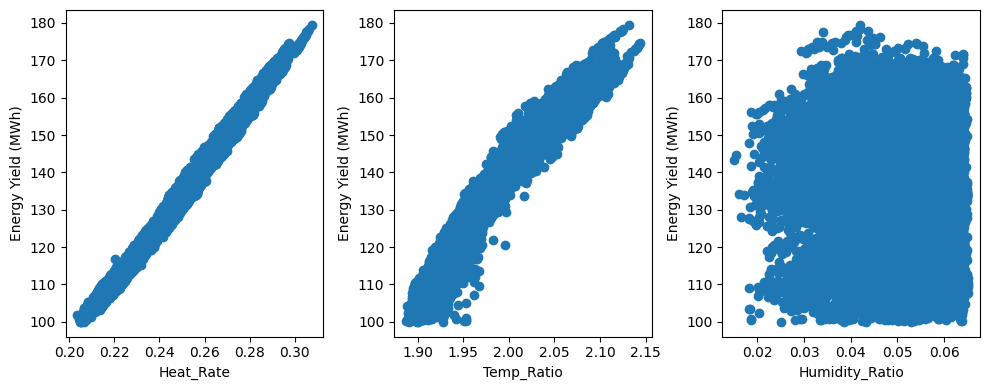

In [109]:
# create feature matrix X and target variable vector y

X = df.drop('TEY', axis=1)  # drop the target variable column from the features dataframe
y = df['TEY']  # select the target variable colum

# train your machine learning model on the full dataset
model = LinearRegression()
model.fit(X, y)

# get the coefficients and feature names from the model
coef = model.coef_
feature_names = df.drop('TEY', axis=1).columns.tolist() # list of feature names in the same order as the columns of X

# find the indices of the top three most important features
top_three_idx = np.argsort(np.abs(coef))[::-1][:3]

# create scatter plots of the relationship between each of the top three features and the target variable
plt.figure(figsize=(10, 4))
for i, idx in enumerate(top_three_idx):
    plt.subplot(1, 3, i+1)
    plt.scatter(X.iloc[:,idx], y)      # .iloc else error when trying to ref as an integer. 
    plt.xlabel(feature_names[idx])    
    plt.ylabel('Energy Yield (MWh)')
plt.tight_layout()
plt.show()


<p>
The output shows that the heat rate, log of the temperature ratio of the inlet and outlet turbine temperature as well as the log of the turbine inlet temperature had the strongest linear relationship with the Energy Yield of the turbine. Its interesting to note that these three features (parameters) were not in the original dataset, but where generated during the transformation stage. The intuition is also consistent with literature on the operations of turbines, whose efficiency is generally based on how much heat is extracted from the system.
</p>

<h3 style="size: 155px;">VISUALIZATION - RANDOM FOREST REGRESSION</h3>

<p></p>

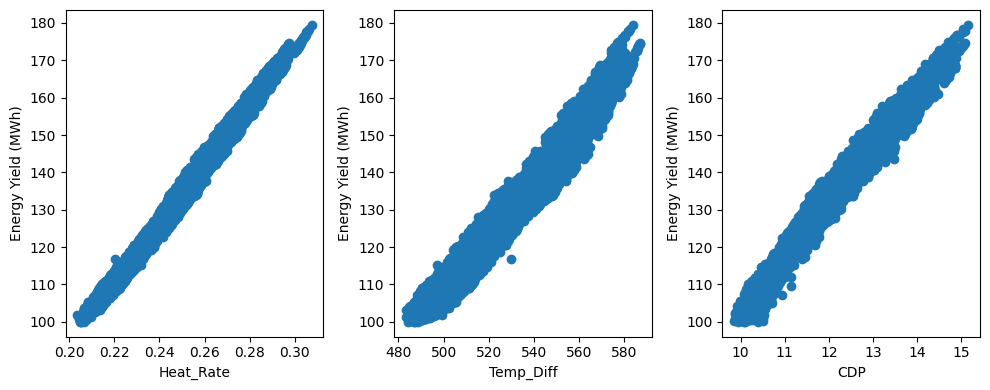

In [60]:
X = df.drop('TEY', axis=1)  # drop the target variable column from the features dataframe
y = df['TEY']  # select the target variable column

# train your machine learning model on the full dataset
model = RandomForestRegressor()
model.fit(X, y)

# get the feature importances and feature names from the model
importances = model.feature_importances_
feature_names = df.drop('TEY', axis=1).columns.tolist() # list of feature names in the same order as the columns of X

# find the indices of the top three most important features
top_three_idx = np.argsort(importances)[::-1][:3]

# create scatter plots of the relationship between each of the top three features and the target variable
plt.figure(figsize=(10, 4))
for i, idx in enumerate(top_three_idx):
    plt.subplot(1, 3, i+1)
    plt.scatter(X.iloc[:,idx], y)
    plt.xlabel(feature_names[idx])
    plt.ylabel('Energy Yield (MWh)')
plt.tight_layout()
plt.show()

<h3 style="size: 155px;">VISUALIZATION - XGBOOST REGRESSION</h3>

<p></p>

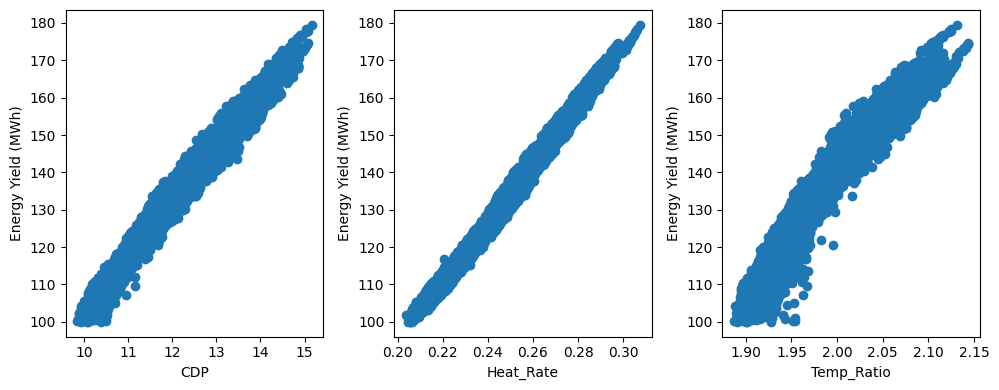

In [61]:
X = df.drop('TEY', axis=1)  # drop the target variable column from the features dataframe
y = df['TEY']  # select the target variable column

# train your machine learning model on the full dataset
model = XGBRegressor()
model.fit(X, y)

# get the feature importances and feature names from the model
importances = model.feature_importances_
feature_names = df.drop('TEY', axis=1).columns.tolist() # list of feature names in the same order as the columns of X

# find the indices of the top three most important features
top_three_idx = np.argsort(importances)[::-1][:3]

# create scatter plots of the relationship between each of the top three features and the target variable
plt.figure(figsize=(10, 4))
for i, idx in enumerate(top_three_idx):
    plt.subplot(1, 3, i+1)
    plt.scatter(X.iloc[:,idx], y)
    plt.xlabel(feature_names[idx])
    plt.ylabel('Energy Yield (MWh)')
plt.tight_layout()
plt.show()

<h3 style="size: 155px;">VISUALIZATION - SUPPORT VECTOR REGRESSION (SVR)</h3>

<p></p>

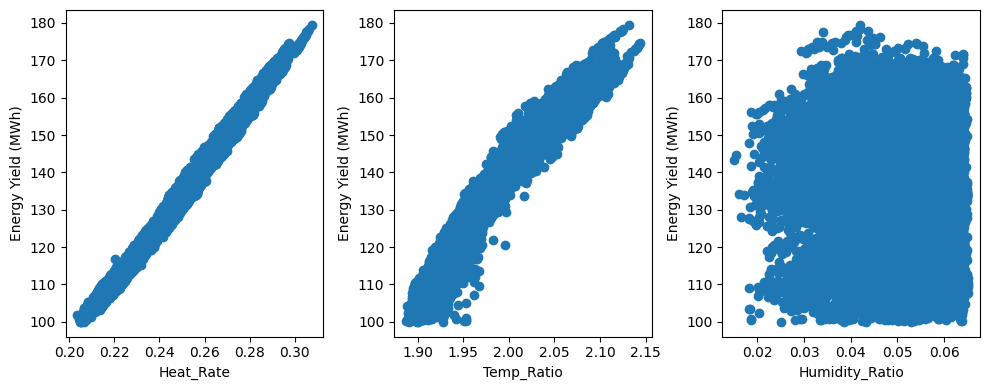

In [111]:
X = df.drop('TEY', axis=1)  # drop the target variable column from the features dataframe
y = df['TEY']  # select the target variable column

# train your machine learning model on the full dataset
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
model.fit(X, y)

# get the coefficients and feature names from the model
#coef = model.coef_[0]
feature_names = df.drop('TEY', axis=1).columns.tolist() # list of feature names in the same order as the columns of X

# find the indices of the top three most important features
top_three_idx = np.argsort(np.abs(coef))[::-1][:3]

# create scatter plots of the relationship between each of the top three features and the target variable
plt.figure(figsize=(10, 4))
for i, idx in enumerate(top_three_idx):
    plt.subplot(1, 3, i+1)
    plt.scatter(X.iloc[:,idx], y)
    plt.xlabel(feature_names[idx])
    plt.ylabel('Energy Yield (MWh)')
plt.tight_layout()
plt.show()


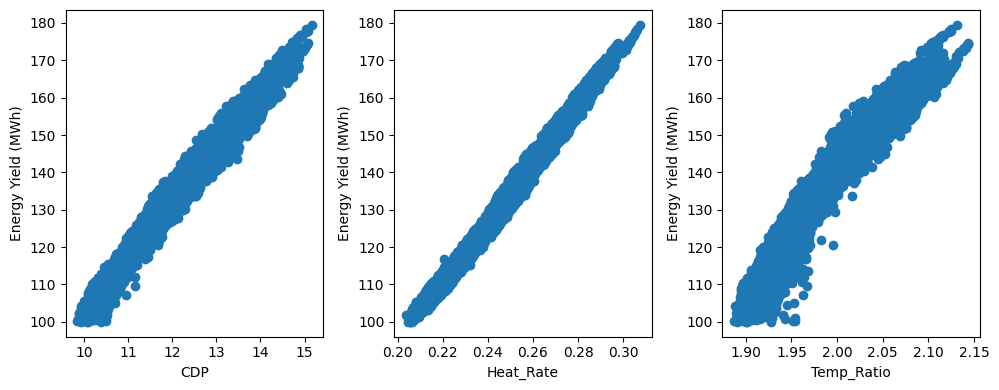

In [110]:
X = df.drop('TEY', axis=1)  # drop the target variable column from the features dataframe
y = df['TEY']  # select the target variable column

# train your machine learning model on the full dataset
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
model.fit(X, y)

# get the feature importances and feature names from the model
#importances = model.feature_importances_
feature_names = df.drop('TEY', axis=1).columns.tolist() # list of feature names in the same order as the columns of X

# find the indices of the top three most important features
top_three_idx = np.argsort(importances)[::-1][:3]

# create scatter plots of the relationship between each of the top three features and the target variable
plt.figure(figsize=(10, 4))
for i, idx in enumerate(top_three_idx):
    plt.subplot(1, 3, i+1)
    plt.scatter(X.iloc[:,idx], y)
    plt.xlabel(feature_names[idx])
    plt.ylabel('Energy Yield (MWh)')
plt.tight_layout()
plt.show()